In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Sur toutes les données histo

In [3]:
base = pd.read_csv("/Users/victorhuynh/Downloads/histos_sieges.csv")

In [4]:
base.head()

,Unnamed: 0,Jour,Horaire théorique,Horaire bloc,Compagnie,Code IATA compagnie,Code OACI compagnie,Numéro de vol,Faisceau facturation,Pays,...,Plateforme code,Libellé plateforme,Aérogare,Libellé aérogare,Terminal,Libellé terminal,Nombre de mouvements réalisés,Nombre de vol atterris décollés,Nombre de passagers réalisés,Sièges Corrections_ICI
0,43,2012/04/01 00:00:00,2012/04/01 13:40:00,2012/04/01 16:05:00,CUBANA,CU,CUB,CU445,International,CUBA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,241,262.0
1,89,2012/02/02 00:00:00,2012/02/02 20:30:00,2012/02/02 20:49:00,TWIN JET,T7,TJT,T75016,National,FRANCE,...,ORY,Orly,ORYO,ORY OUEST,ORYW,ORY OUEST,1,1,13,19.0
2,322,2012/02/11 00:00:00,2012/02/11 11:30:00,2012/02/11 11:20:00,CORSAIR INTL,SS,CRL,SS943,International,ETATS-UNIS USA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,168,350.0
3,560,2012/02/20 00:00:00,2012/02/20 11:25:00,2012/02/20 10:45:00,CORSAIR INTL,SS,CRL,SS943,International,ETATS-UNIS USA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,266,350.0
4,563,2012/02/19 00:00:00,2012/02/19 10:30:00,2012/02/19 10:57:00,CUBANA,CU,CUB,CU444,International,CUBA,...,ORY,Orly,ORYS,ORY SUD,ORYS,ORY SUD,1,1,249,262.0


## Répartition des vols par faisceaux

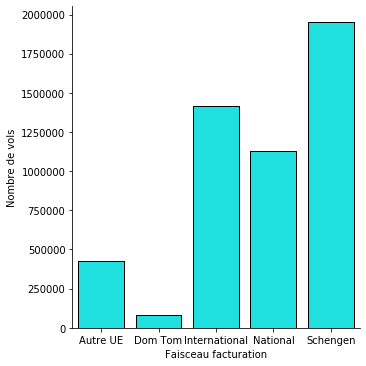

In [ ]:
df = base.groupby('Faisceau facturation').aggregate({'Jour' : 'count'}).reset_index()
df = df.rename(columns={'Jour': 'Nombre de vols'})
sns.catplot(x='Faisceau facturation', y='Nombre de vols', edgecolor="black", data=df,kind = "bar", color = "cyan")

## Répartition des vols par pays

In [9]:
arrivees = base[base['Type de mouvement'] == 'Arrivée'].reset_index(drop = True)
departs = base[base['Type de mouvement'] == 'Départ'].reset_index(drop = True)

Text(0.5, 1, 'Nombre de départs par pays vers un aéroport Français')

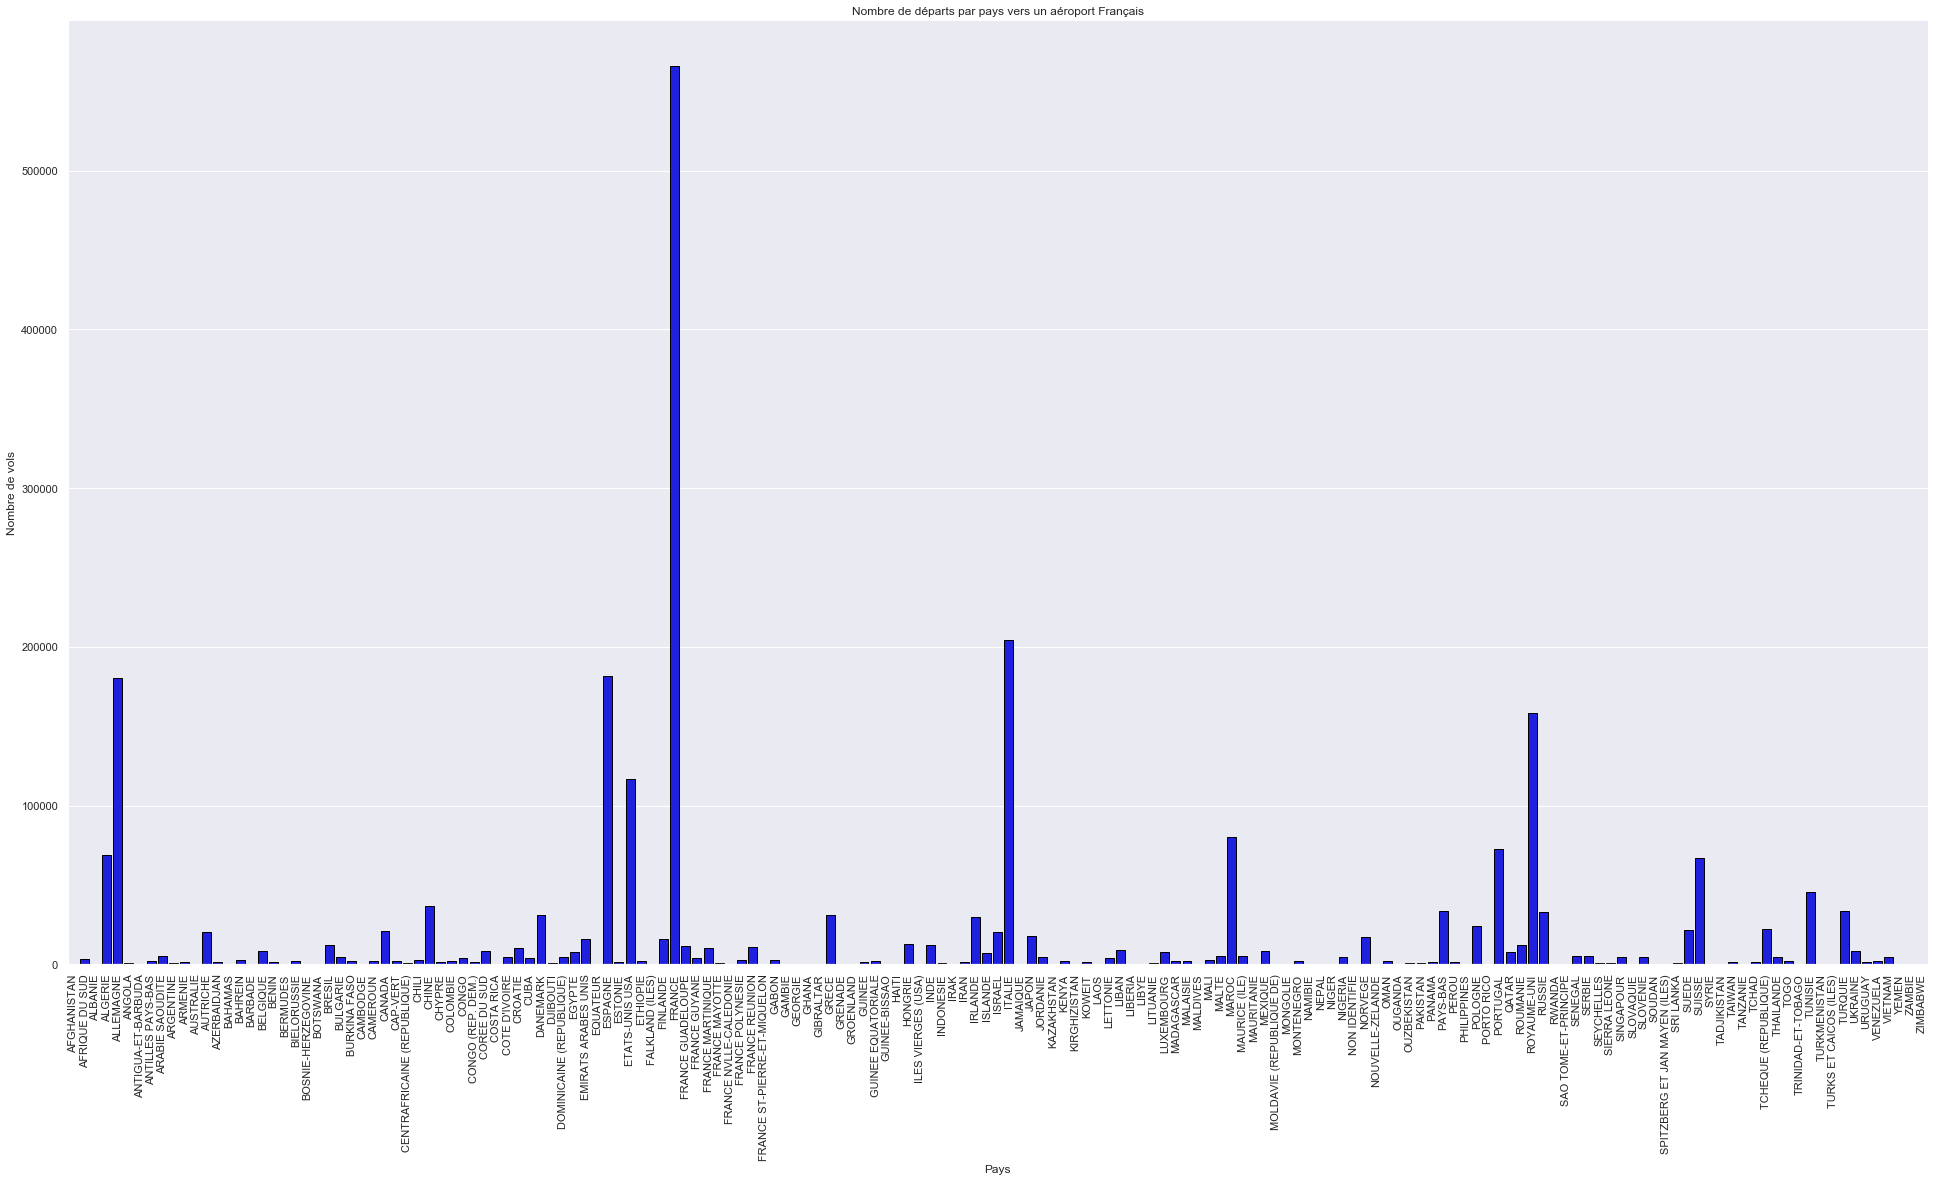

In [55]:
df = arrivees.groupby('Pays').aggregate({'Jour':'count'}).reset_index()
df = df.rename(columns={'Jour': 'Nombre de vols'})
g = sns.catplot(x='Pays', y='Nombre de vols', edgecolor="black", data=df,kind = "bar", color = "blue", label='small')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(40,15)
plt.title("Nombre de départs vers un aéroport Français par pays")

Text(0.5, 1, 'Nombre de vols entrants depuis la France par pays')

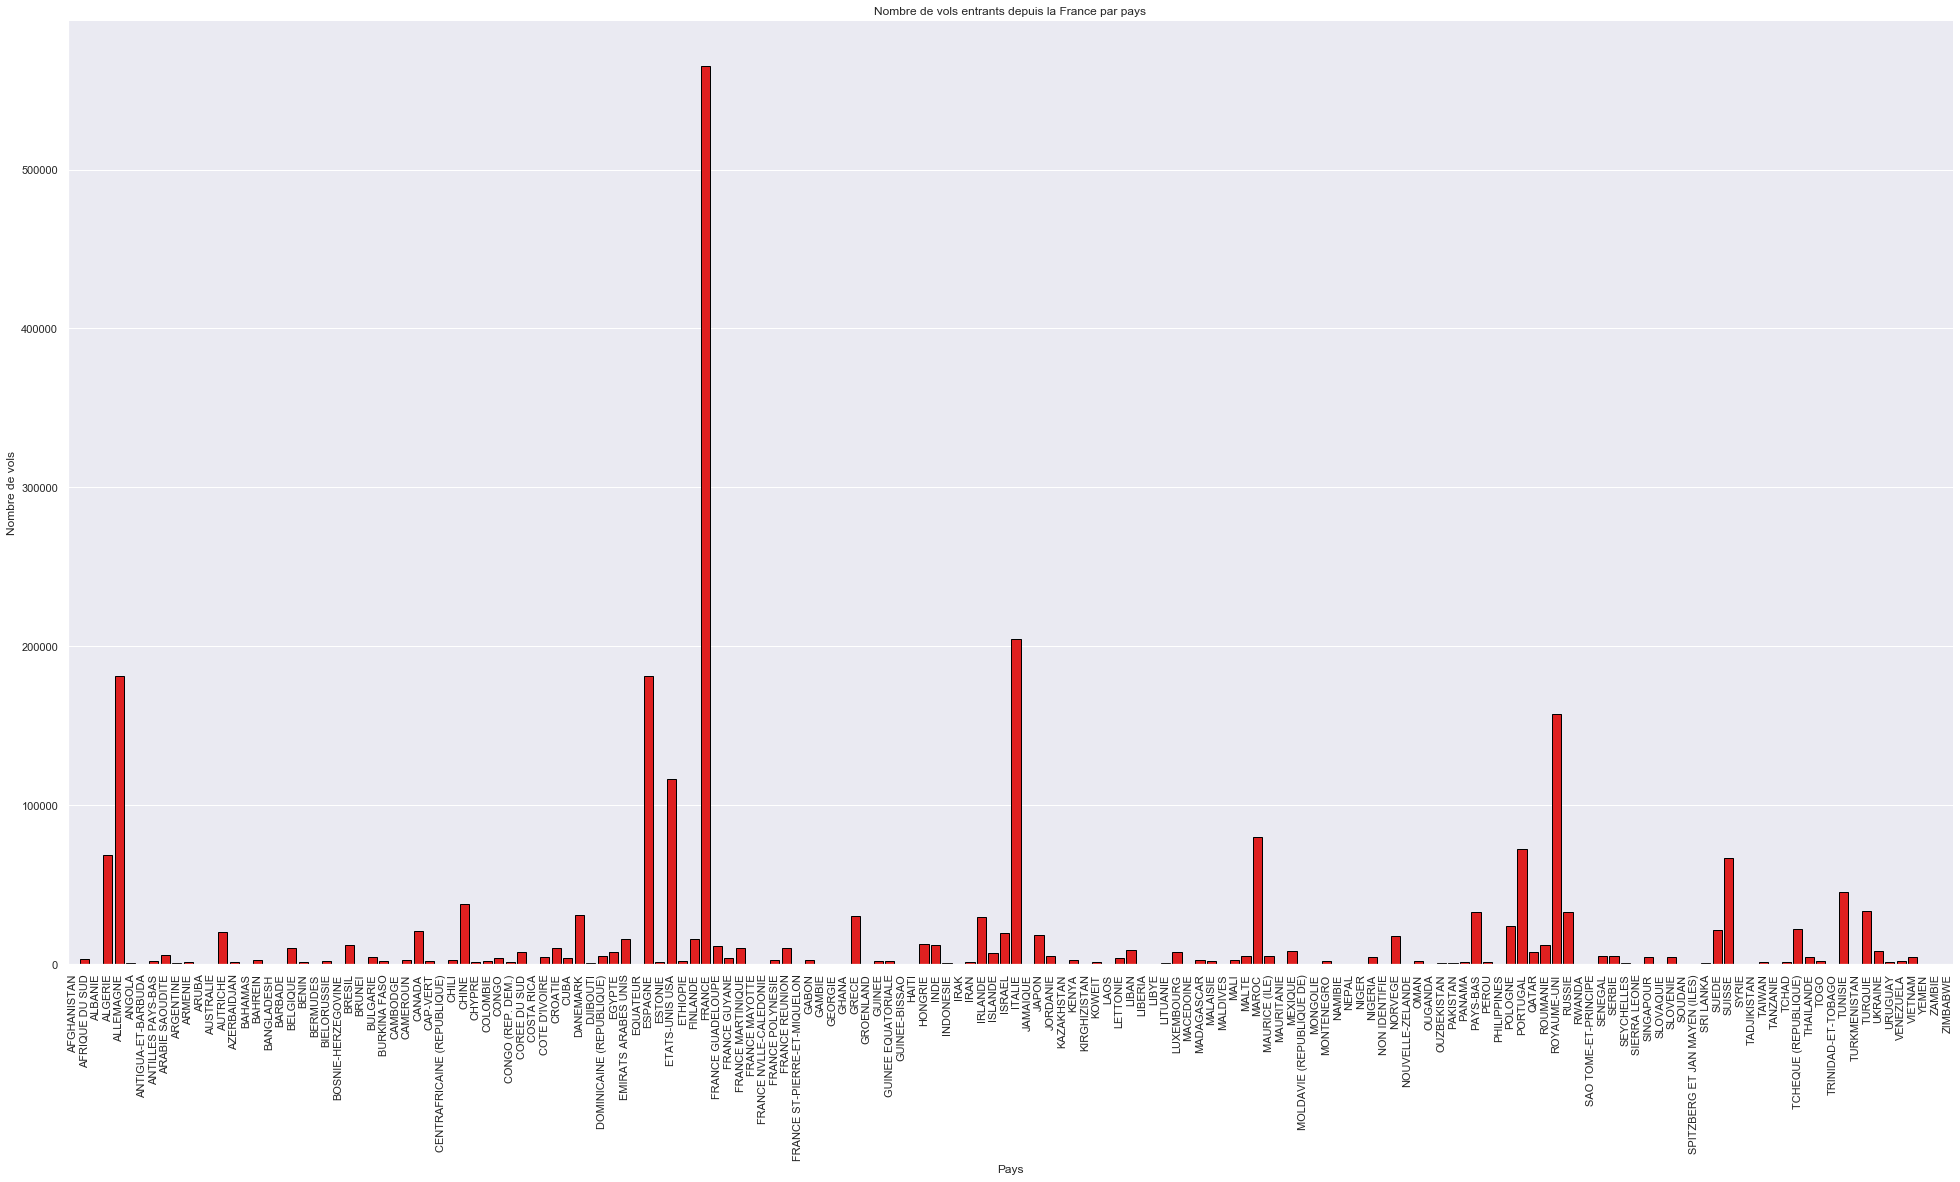

In [56]:
df = departs.groupby('Pays').aggregate({'Jour':'count'}).reset_index()
df = df.rename(columns={'Jour': 'Nombre de vols'})
g = sns.catplot(x='Pays', y='Nombre de vols', edgecolor="black", data=df,kind = "bar", color = "red", label='small')
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(40,15)
plt.title("Nombre de vols entrants depuis la France par pays")

## Saisonalité des vols

Mois par mois

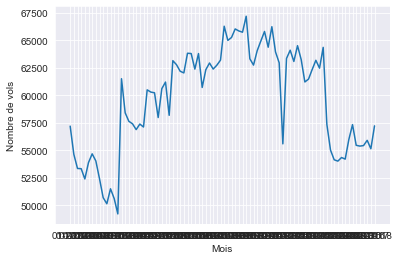

In [ ]:
sns.set_style("darkgrid") #Choix du style de fond de nos graphiques
base = base.astype({'Jour': 'datetime64[ns]'})
base['Mois'] = base['Jour'].dt.strftime('%m-%Y')
df = base.groupby('Mois').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Mois', y='Nombre de vols', data=df)

Jour par jour

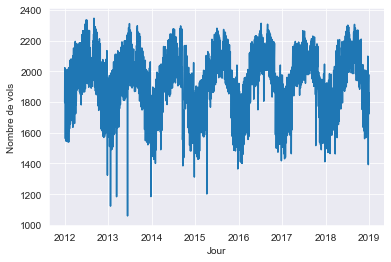

In [ ]:
df = base.groupby('Jour').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Jour', y='Nombre de vols', data=df)

## Taux de remplissage

In [5]:
base['Taux de remplissage réel'] = base['Nombre de passagers réalisés']/base['Sièges Corrections_ICI']

In [6]:
faisceaux =['Schengen', 'International', 'Autre UE', 'National', 'Dom Tom']

In [7]:
df_Schengen = base[base['Faisceau facturation'] == 'Schengen'].reset_index(drop = True)
df_Int = base[base['Faisceau facturation'] == 'International'].reset_index(drop = True)
df_UENS = base[base['Faisceau facturation'] == 'Autre UE'].reset_index(drop = True)
df_Nat = base[base['Faisceau facturation'] == 'National'].reset_index(drop = True)
df_DT = base[base['Faisceau facturation'] == 'Dom Tom'].reset_index(drop = True)

# Sur 2016 seulement

In [3]:
base2016 = pd.read_csv(r"/Users/victorhuynh/Downloads/histo_2016.csv")

In [4]:
base2016['Taux de remplissage réel'] = base2016['Nombre de passagers réalisés']/base2016['Sièges Corrections_ICI']

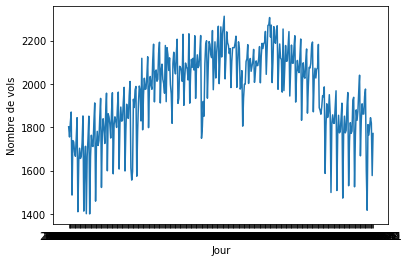

In [5]:
df = base2016.groupby('Jour').aggregate({'Numéro de vol' : 'count'})
df = df.rename(columns={'Numéro de vol': 'Nombre de vols'}).reset_index()
g = sns.lineplot(x='Jour', y='Nombre de vols', data=df)

## Comparaison entre LF% de FQMs et taux de remplissage réel en 2016

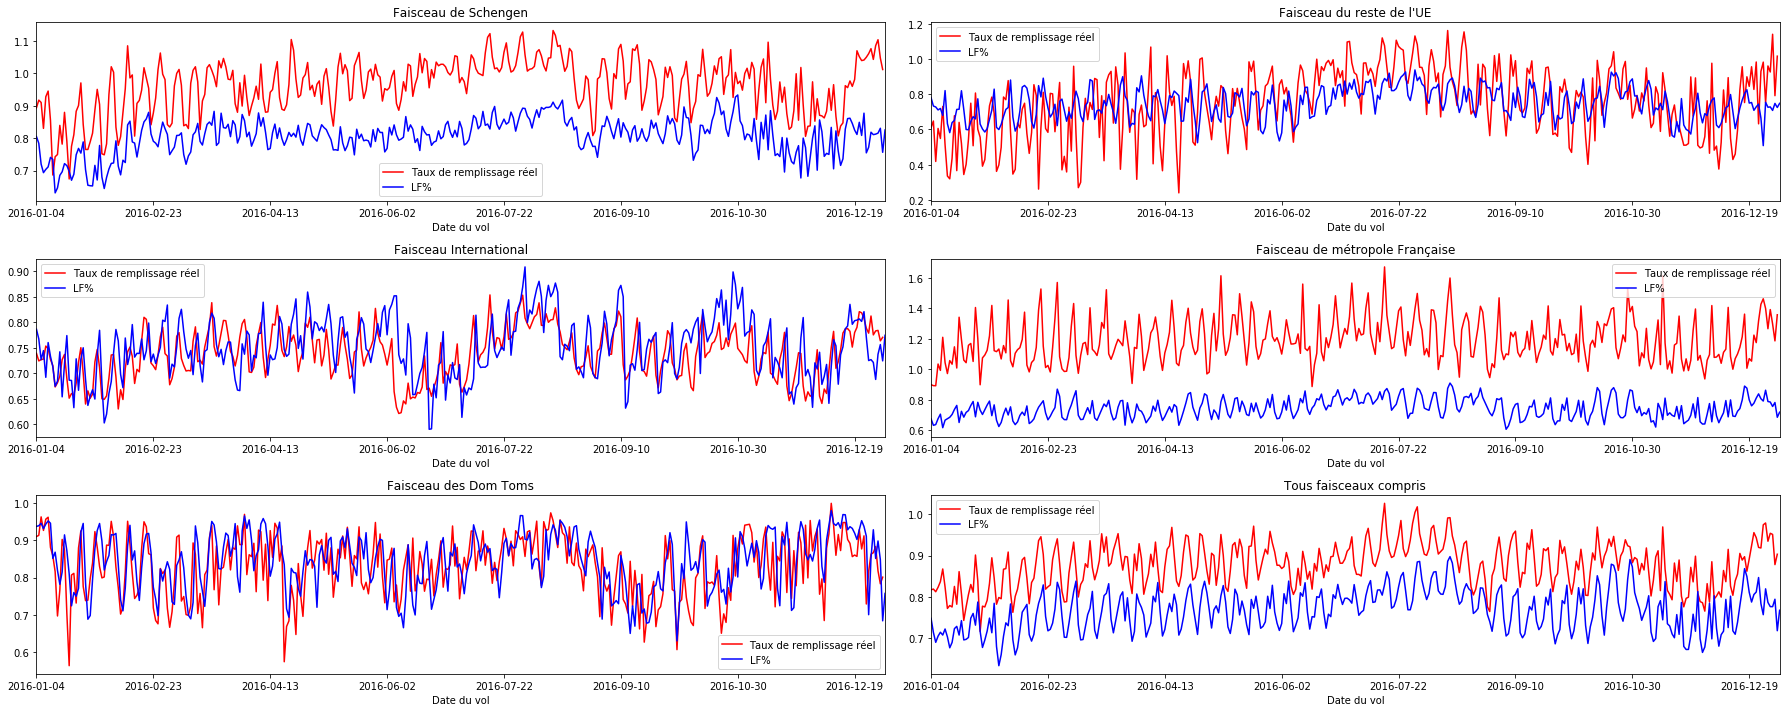

In [29]:
colors = ['red','blue'] 
fqms2016 = pd.read_csv(r'https://raw.githubusercontent.com/erialc-cal/StatApp_2020/main/Data/FQMs/fqms_2016.csv')
faisceaux2 =['SCH', 'INT', 'CEE', 'MTP', 'DTM'] #Codage des faisceaux dans fqms
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,10))

base2016[base2016['Faisceau facturation'] == 'Schengen'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'SCH'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1])
axes[0,0].legend()
axes[0,0].set_title('Faisceau de Schengen')

base2016[base2016['Faisceau facturation'] == 'International'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'INT'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
axes[1,0].legend()
axes[1,0].set_title('Faisceau International')

base2016[base2016['Faisceau facturation'] == 'Autre UE'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'CEE'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1])
axes[0,1].legend()
axes[0,1].set_title("Faisceau du reste de l'UE")

base2016[base2016['Faisceau facturation'] == 'National'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'MTP'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1])
axes[1,1].legend()
axes[1,1].set_title('Faisceau de métropole Française')

base2016[base2016['Faisceau facturation'] == 'Dom Tom'].groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0])
fqms2016[fqms2016['Qualité'] == 'DTM'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1])
axes[2,0].legend()
axes[2,0].set_title('Faisceau des Dom Toms')

base2016.groupby('Jour').agg({'Taux de remplissage réel':'mean'}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0])
fqms2016.groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1])
axes[2,1].legend()
axes[2,1].set_title('Tous faisceaux compris')

plt.tight_layout() #Pour que nos graphiques ne se collent pas tous

Sous forme de fonction pour si on veut changer les paramètres :

In [30]:
def compare_histo_fqms(agregation_fqms, agregation_histo,variable_fqms, variable_histo, func_agreg_fqms,func_agreg_histo):
  colors = ['red','blue'] 
  faisceaux2 =['SCH', 'INT', 'CEE', 'MTP', 'DTM'] #Codage des faisceaux dans fqms
  fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,10))

  base2016[base2016['Faisceau facturation'] == 'Schengen'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'SCH'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[1])
  axes[0,0].legend()
  axes[0,0].set_title('Faisceau de Schengen')

  base2016[base2016['Faisceau facturation'] == 'International'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'INT'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
  axes[1,0].legend()
  axes[1,0].set_title('Faisceau International')

  base2016[base2016['Faisceau facturation'] == 'Autre UE'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'CEE'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[1])
  axes[0,1].legend()
  axes[0,1].set_title("Faisceau du reste de l'UE")

  base2016[base2016['Faisceau facturation'] == 'National'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'MTP'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[1])
  axes[1,1].legend()
  axes[1,1].set_title('Faisceau de métropole Française')

  base2016[base2016['Faisceau facturation'] == 'Dom Tom'].groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[0])
  fqms2016[fqms2016['Qualité'] == 'DTM'].groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[1])
  axes[2,0].legend()
  axes[2,0].set_title('Faisceau des Dom Toms')

  base2016.groupby(agregation_histo).agg({variable_histo:func_agreg_histo}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[0])
  fqms2016.groupby(agregation_fqms).agg({variable_fqms:func_agreg_fqms}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[1])
  axes[2,1].legend()
  axes[2,1].set_title('Tous faisceaux compris')

  plt.tight_layout() #Pour que nos graphiques ne se collent pas tous

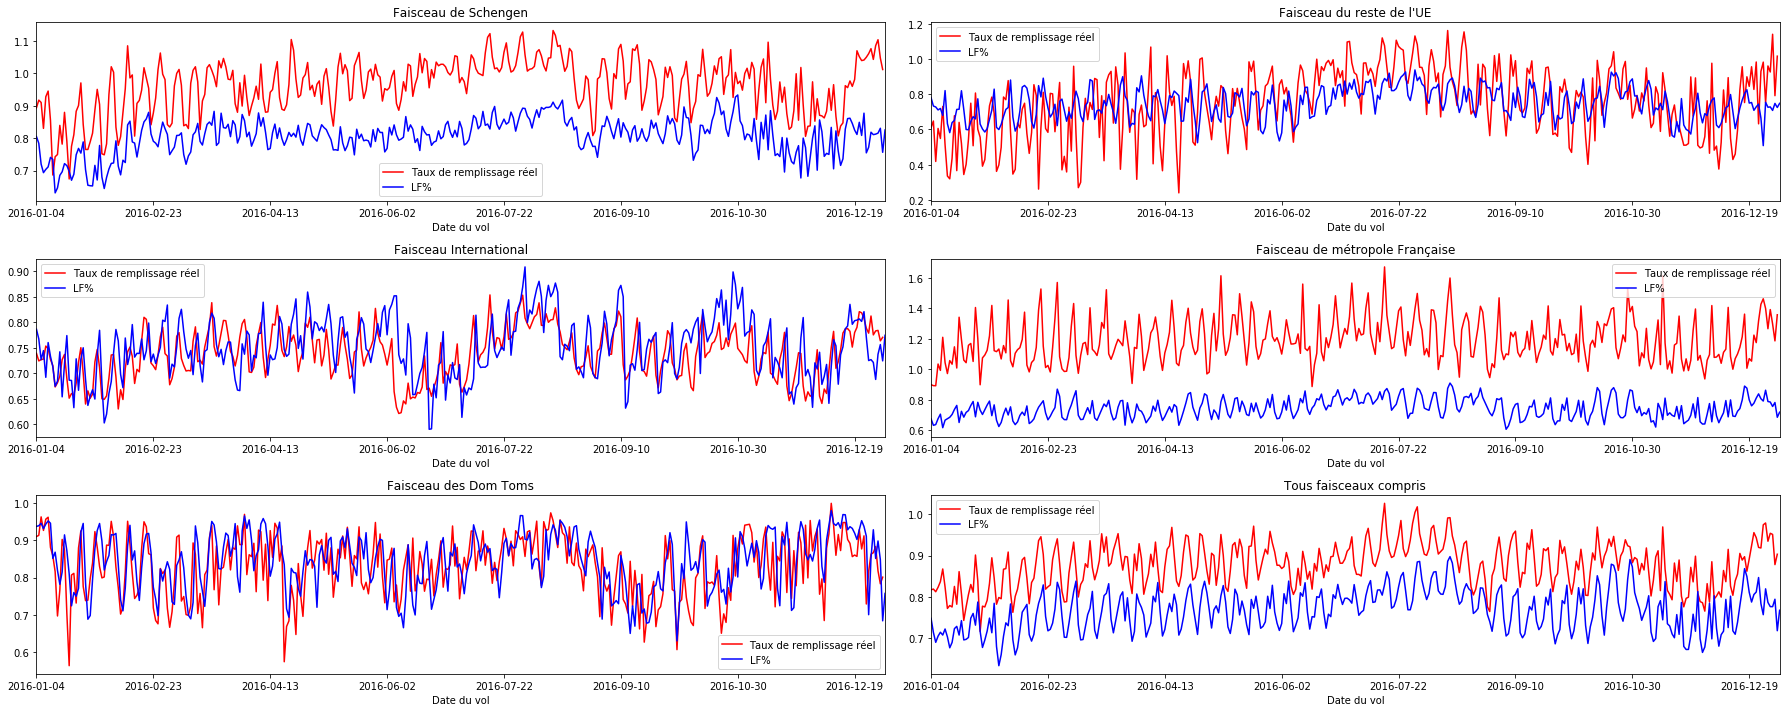

In [31]:
compare_histo_fqms('Date du vol', 'Jour', 'LF%', 'Taux de remplissage réel', 'mean', 'mean')

Tentons de faire par semaine au lieu de jour

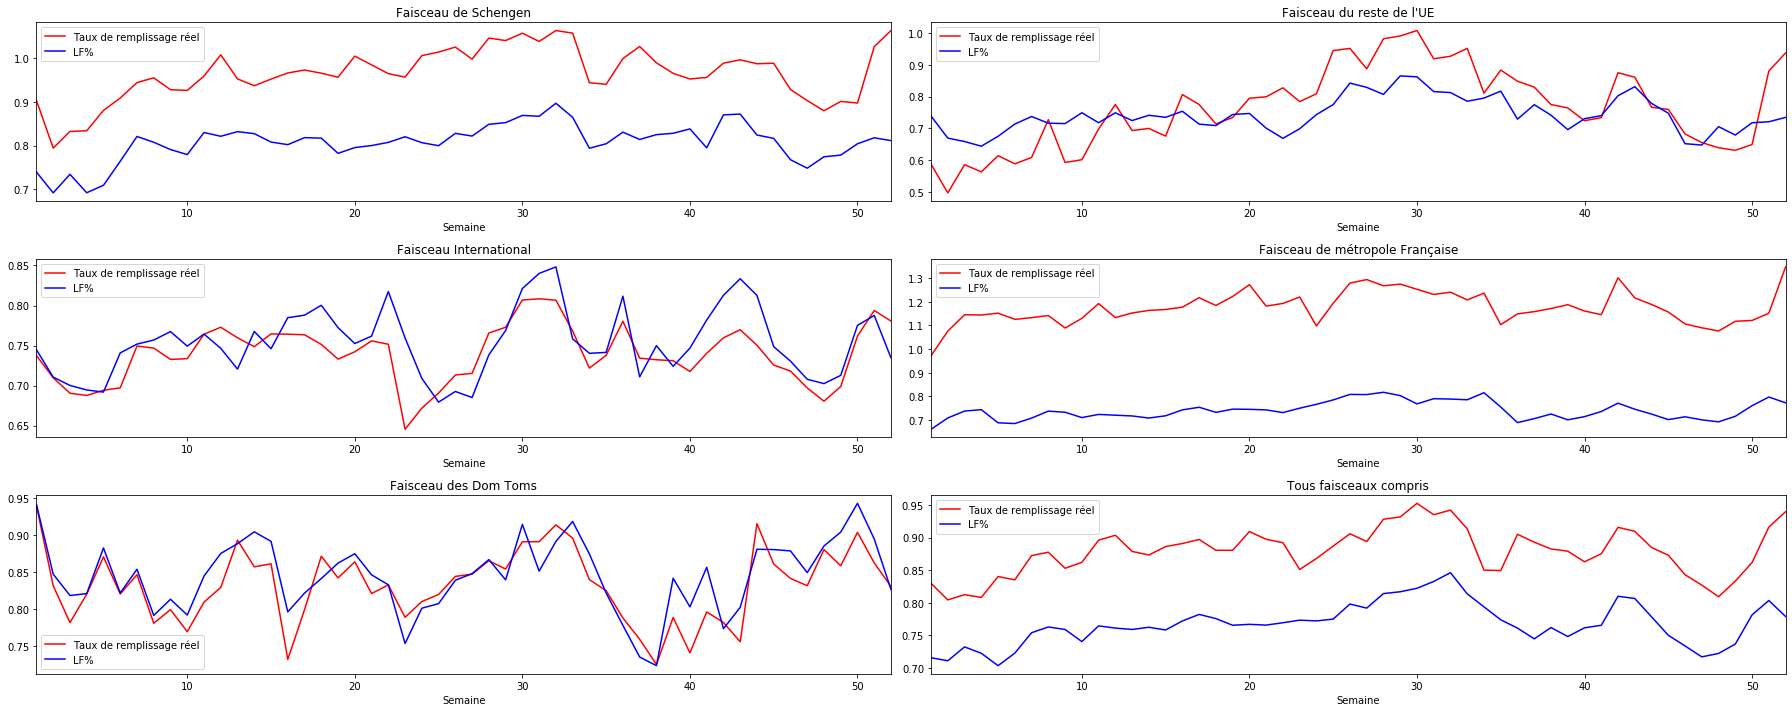

In [51]:
base2016 = base2016.astype({'Jour': 'datetime64[ns]'})
base2016['Semaine'] = base2016['Jour'].dt.week
compare_histo_fqms('Semaine', 'Semaine', 'LF%', 'Taux de remplissage réel', 'mean', 'mean')

# Identification du problème de LF% en 2017 rencontré lors de la précédente réunion

In [78]:
fqms = pd.read_csv('fqms_concat_def.csv')

Lors de notre dernière réunion, on avait ces graphiques représentant par date le taux de remplissage théorique (LF%) : il y avait un problème en 2017 (où le LF% valait 0 pour cause d'absence de données). L'encadrant nous a demandé d'identifier les dates exactes concernées.

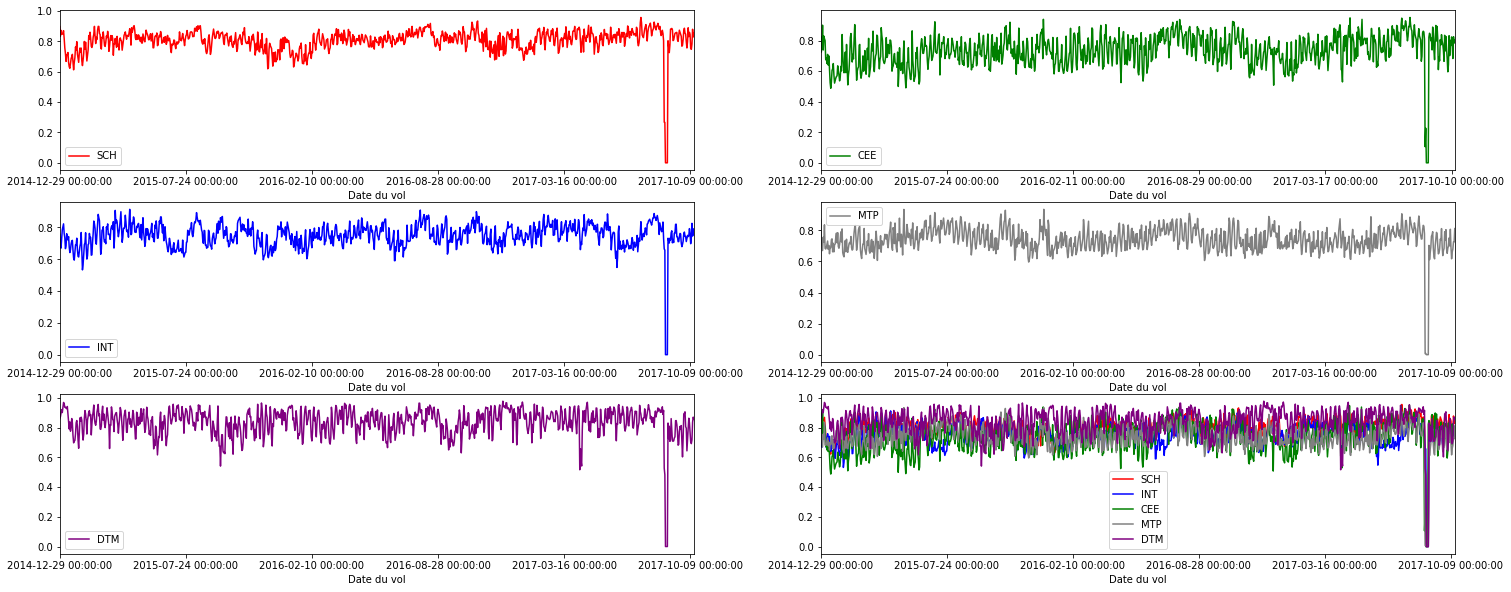

In [77]:
faisceaux_recode =['SCH', 'INT', 'CEE', 'MTP', 'DTM']
colors = ['red','blue', 'green', 'grey', 'purple'] 
fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(25,10))

fqms[fqms['Qualité']== 'SCH'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,0],legend=True, subplots=True, color=colors[0])
axes[0,0].legend(faisceaux_recode[0:5])

fqms[fqms['Qualité']== 'INT'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,0],legend=True, subplots=True, color=colors[1])
axes[1,0].legend(faisceaux_recode[1:5])

fqms[fqms['Qualité']== 'CEE'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[0,1],legend=True, subplots=True, color=colors[2])
axes[0,1].legend(faisceaux_recode[2:5])

fqms[fqms['Qualité']== 'MTP'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[1,1],legend=True, subplots=True, color=colors[3])
axes[1,1].legend(faisceaux_recode[3:5])

fqms[fqms['Qualité']== 'DTM'].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,0],legend=True, subplots=True, color=colors[4])
axes[2,0].legend(faisceaux_recode[4:5])

for i in range(len(faisceaux_recode)):
    fqms[fqms['Qualité']== faisceaux_recode[i]].groupby('Date du vol').agg({'LF%':'mean'}).plot(ax = axes[2,1],legend=True, subplots=True, color=colors[i])
axes[2,1].legend(faisceaux_recode)

In [96]:
fqms_sans_LF = fqms[fqms['LF%'].isnull()] #On récupère les lignes dans lesquelles LF% est vide
fqms_sans_LF = fqms_sans_LF[fqms_sans_LF['Date du vol'].str.contains('2017') == True].reset_index(drop = True) #On récupère les dates uniquement (on supprime les lignes qui ne sont pas des dates)
fqms_sans_LF['Date du vol'].value_counts() #On affiche les dates concernées par le problème

2017-04-14 00:00:00    373
2017-04-10 00:00:00    351
2017-04-13 00:00:00    340
2017-04-12 00:00:00    338
2017-04-11 00:00:00    335
2017-04-15 00:00:00    314
2017-04-16 00:00:00    314
Name: Date du vol, dtype: int64

Les dates exactes pour lesquelles il nous manque les données de LF% sont du 10 au 17 avril 2017.

L'encadrant nous a aussi demandé de renseigner les types avions concernés par le manque d’info, ainsi que le nom de leur compagnie : 

In [99]:
fqms_sans_LF['Cie'].value_counts()

AF     799
TO     334
EZY    193
VY     164
AT     106
ZI      96
A5      85
TP      77
XK      57
AH      53
TU      47
TX      40
IB      37
SS      32
T7      30
UX      29
BA      28
TB      22
EZS     18
AZ      18
T3      17
EC      15
PC      14
DY      14
KM       9
D8       9
FV       7
HV       6
FI       6
IR       2
CU       1
Name: Cie, dtype: int64

In [100]:
fqms_sans_LF['Tav'].value_counts()

320    987
73H    406
CRK    175
738    145
319    144
321     90
AT4     66
333     46
77W     35
32B     33
AT5     21
BEH     20
AT7     20
100     19
ER4     17
763     15
744     15
75W     14
772     14
359     13
E75     13
32A     12
332     11
BE1     10
736      7
788      6
E95      3
73G      3
AB6      2
CR7      1
IL9      1
E90      1
Name: Tav, dtype: int64